## Develop branch. 
### Тестирование мультипроцессорности

In [1]:
from src import HybridMetaheuristic


baboon = HybridMetaheuristic("pic/baboon.png", "pic/logo.png")

/home/evgeny/Documents/vkr/src/utilities.py:104: RuntimeWarning: divide by zero encountered in log
  items.append(i * np.log(i))
/home/evgeny/Documents/vkr/src/utilities.py:104: RuntimeWarning: invalid value encountered in scalar multiply
  items.append(i * np.log(i))


In [2]:
# Запускаю алгоритм гибридной метаэвристики
baboon.evolution()

  0%|                                                    | 0/30 [00:00<?, ?it/s]

Best score: 2.3973476512519345


  3%|█▍                                          | 1/30 [00:54<26:22, 54.57s/it]

Best score: 2.396067908542207


 10%|████▍                                       | 3/30 [03:20<31:12, 69.34s/it]

Best score: 2.394223290749893


 20%|████████▊                                   | 6/30 [06:48<27:44, 69.34s/it]

Best score: 2.3935254644091772


 23%|██████████▎                                 | 7/30 [08:49<32:57, 86.00s/it]

Best score: 2.3934502468335737


 27%|███████████▋                                | 8/30 [09:55<29:13, 79.72s/it]

Best score: 2.3930908795288586


 30%|█████████████▏                              | 9/30 [11:11<27:31, 78.66s/it]

Best score: 2.392867671775042


 33%|██████████████▎                            | 10/30 [12:36<26:54, 80.72s/it]

Best score: 2.390906476611706


 43%|██████████████████▋                        | 13/30 [16:53<24:03, 84.94s/it]

Best score: 2.390747762411017


 47%|████████████████████                       | 14/30 [18:08<21:47, 81.75s/it]

Best score: 2.390414924714246


 50%|█████████████████████▌                     | 15/30 [19:12<19:07, 76.49s/it]

Best score: 2.3902237083514954


 53%|██████████████████████▉                    | 16/30 [21:03<20:17, 86.95s/it]

Best score: 2.3897936838581204


 57%|████████████████████████▎                  | 17/30 [22:30<18:51, 87.03s/it]

Best score: 2.3889146359053512


 60%|█████████████████████████▊                 | 18/30 [23:50<16:56, 84.71s/it]

Best score: 2.3888543958500423


 67%|████████████████████████████▋              | 20/30 [26:08<12:46, 76.66s/it]

Best score: 2.3887851158462974


 70%|██████████████████████████████             | 21/30 [27:52<12:41, 84.64s/it]

Best score: 2.3885926525200523


 73%|███████████████████████████████▌           | 22/30 [29:27<11:42, 87.84s/it]

Best score: 2.3880226271095735


 77%|████████████████████████████████▉          | 23/30 [31:12<10:51, 93.07s/it]

Best score: 2.3879506413993754


 90%|██████████████████████████████████████▋    | 27/30 [36:45<04:20, 86.95s/it]

Best score: 2.387453110435068


100%|███████████████████████████████████████████| 30/30 [40:10<00:00, 80.35s/it]


In [7]:
# Лучший параметр Светлячка
baboon.best_firefly_value = 9

In [8]:
from src import Watermark

# Пробую погрузить ЦВЗ с полученными параметрами
watermark = Watermark(
    baboon.best_candidate_indexes, 
    baboon.embedded_image_bin, 
    baboon.image_matrix, 
    baboon.best_firefly_value
)

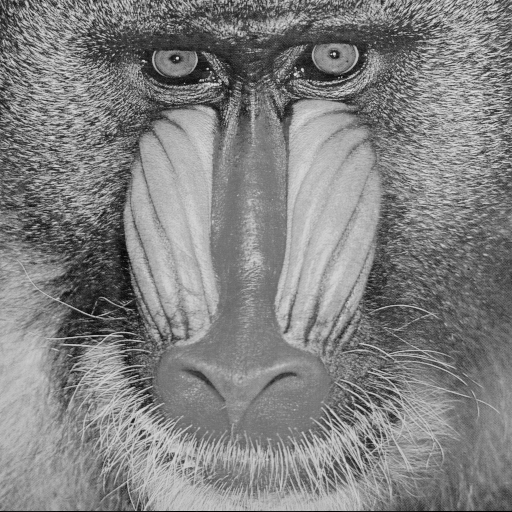

In [9]:
# Исходное изображение без ЦВЗ
baboon.image

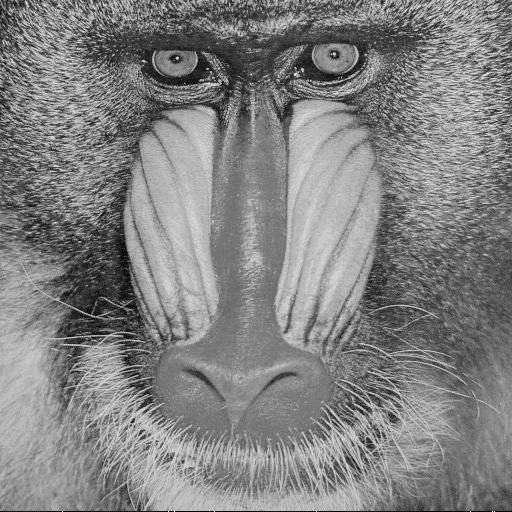

In [10]:
# Полученное изображение с ЦВЗ
watermark.watermark

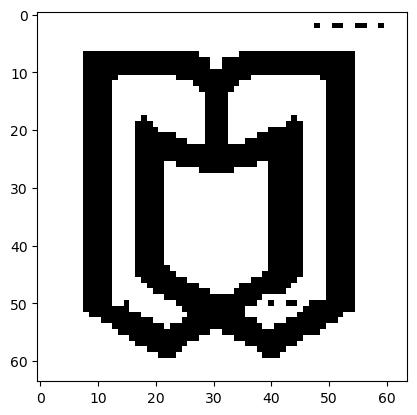

In [11]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [12]:
from src import Attack, Utilities

attacked = Attack(watermark.watermark)

In [13]:
# медианный фильтр

mf = Utilities.extracting(Utilities.matrix_to_image(attacked.mf), watermark.secret_key)
Utilities.get_normal_correlation(mf, watermark.embedded_image_bin)

0.6598540145985401

In [14]:
# фильтр Гаусса

gs3 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs3), watermark.secret_key)
Utilities.get_normal_correlation(gs3, watermark.embedded_image_bin)

0.9992743105950653

In [15]:
# фильтр Гаусса, kernel=5

gs5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs5), watermark.secret_key)
Utilities.get_normal_correlation(gs5, watermark.embedded_image_bin)

0.9992743105950653

In [16]:
# усредненная фильтрация, kernel=3

avr = Utilities.extracting(Utilities.matrix_to_image(attacked.avr), watermark.secret_key)
Utilities.get_normal_correlation(avr, watermark.embedded_image_bin)

0.6178984414278532

In [17]:
# Фильтр увеличивает контраст соседних пикселей

shr = Utilities.extracting(Utilities.matrix_to_image(attacked.shr), watermark.secret_key)
Utilities.get_normal_correlation(shr, watermark.embedded_image_bin)

0.9992761491132827

In [18]:
# Изменение контрастности изображения с использованием гистограмм

his = Utilities.extracting(Utilities.matrix_to_image(attacked.his), watermark.secret_key)
Utilities.get_normal_correlation(his, watermark.embedded_image_bin)

0.9902658180456758

In [19]:
# Искажения яркости пикселей с параметром gamma=0.2

gc2 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc2), watermark.secret_key)
Utilities.get_normal_correlation(gc2, watermark.embedded_image_bin)

0.9318823055219669

In [20]:
# Искажения яркости пикселей с параметром gamma=0.4

gc4 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc4), watermark.secret_key)
Utilities.get_normal_correlation(gc4, watermark.embedded_image_bin)

0.9862961553102398

In [21]:
# Гауссовый шум с параметром 0,001

gn1 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn1), watermark.secret_key)
Utilities.get_normal_correlation(gn1, watermark.embedded_image_bin)

0.9992743105950653

In [22]:
# Гауссовый шум с параметром 0,005

gn5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn5), watermark.secret_key)
Utilities.get_normal_correlation(gn5, watermark.embedded_image_bin)

0.9989059080962801

In [23]:
# Гауссовый шум с параметром 0,009

gn9 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn9), watermark.secret_key)
Utilities.get_normal_correlation(gn9, watermark.embedded_image_bin)

0.9938136826783115

In [24]:
# Атака соль/перец с параметром p=0.01

sp1 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp1), watermark.secret_key)
Utilities.get_normal_correlation(sp1, watermark.embedded_image_bin)

0.892490118577075

In [25]:
# Атака соль/перец с параметром p=0.02

sp2 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp2), watermark.secret_key)
Utilities.get_normal_correlation(sp2, watermark.embedded_image_bin)

0.8506768189509306

In [26]:
# Атака соль/перец с параметром p=0.03

sp3 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp3), watermark.secret_key)
Utilities.get_normal_correlation(sp3, watermark.embedded_image_bin)

0.7927350427350427

In [27]:
# В заданной области затемняет 1/4 пикселей, с параметром center

crp_ct = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_ct), watermark.secret_key)
Utilities.get_normal_correlation(crp_ct, watermark.embedded_image_bin)

0.8801020408163265

In [28]:
# В заданной области затемняет 1/4 пикселей, с параметром top-left

crp_tl = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_tl), watermark.secret_key)
Utilities.get_normal_correlation(crp_tl, watermark.embedded_image_bin)

0.9520524318730597

In [29]:
# В заданной области затемняет 1/4 пикселей, с параметром bottom-right

crp_br = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_br), watermark.secret_key)
Utilities.get_normal_correlation(crp_br, watermark.embedded_image_bin)

0.8288369304556354

In [30]:
# Растягивает изображения и возвращает к изначальным размерам 

scl_1024 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_1024), watermark.secret_key)
Utilities.get_normal_correlation(scl_1024, watermark.embedded_image_bin)

0.9497053045186641

In [31]:
# Сжимает изображения и возвращает к изначальным размерам 

scl_256 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_256), watermark.secret_key)
Utilities.get_normal_correlation(scl_256, watermark.embedded_image_bin)

0.6963070942662779

In [32]:
# Вращает изображение против часовой стрелки на заданный угол, 5 градусов

rt5 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt5), watermark.secret_key)
Utilities.get_normal_correlation(rt5, watermark.embedded_image_bin)

0.6881233000906618

In [33]:
# Вращает изображение против часовой стрелки на заданный угол, 45 градусов

rt45 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt45), watermark.secret_key)
Utilities.get_normal_correlation(rt45, watermark.embedded_image_bin)

0.6898115840893231

In [34]:
# Вращает изображение против часовой стрелки на заданный угол, 90 градусов

rt90 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt90), watermark.secret_key)
Utilities.get_normal_correlation(rt90, watermark.embedded_image_bin)

0.6743956586087815

In [35]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 70

com70 = Utilities.extracting(Utilities.matrix_to_image(attacked.com70), watermark.secret_key)
Utilities.get_normal_correlation(com70, watermark.embedded_image_bin)

0.999275887038378

In [36]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 80

com80 = Utilities.extracting(Utilities.matrix_to_image(attacked.com80), watermark.secret_key)
Utilities.get_normal_correlation(com80, watermark.embedded_image_bin)

0.999275887038378

In [37]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 90

com90 = Utilities.extracting(Utilities.matrix_to_image(attacked.com90), watermark.secret_key)
Utilities.get_normal_correlation(com90, watermark.embedded_image_bin)

0.999275887038378